![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

from collections import Counter
import re
from datetime import datetime

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/europe-datasets/life_satisfaction_2013.csv
/kaggle/input/europe-datasets/life_expectancy_2016.csv
/kaggle/input/europe-datasets/unemployment_2016.csv
/kaggle/input/europe-datasets/crime_2016.csv
/kaggle/input/europe-datasets/close_relations_2015.csv
/kaggle/input/europe-datasets/median_income_2016.csv
/kaggle/input/europe-datasets/weather.csv
/kaggle/input/europe-datasets/trust_in_police_2013.csv
/kaggle/input/europe-datasets/gdp_2016.csv
/kaggle/input/europe-datasets/job_satisfaction_2013.csv
/kaggle/input/europe-datasets/work_hours_2016.csv
/kaggle/input/europe-datasets/make_ends_meet_2016.csv
/kaggle/input/europe-datasets/low_savings_2016.csv
/kaggle/input/europe-datasets/pollution_2016.csv
/kaggle/input/europe-datasets/env_satisfaction_2013.csv
/kaggle/input/europe-datasets/leisure_satisfaction_2013.csv
/kaggle/input/europe-datasets/trust_in_politics_2013.csv
/kaggle/input/europe-datasets/population_2011.csv
/kaggle/input/europe-datasets/underemployment_2016.csv
/kagg

In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
DATA_DIR1 = '/kaggle/input/europe-datasets/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')
df_europe_median_income = pd.read_csv(DATA_DIR1+'/median_income_2016.csv')
df_europe_life_satisfaction = pd.read_csv(DATA_DIR1+'/life_satisfaction_2013.csv')
df_europe_leisure_satisfaction = pd.read_csv(DATA_DIR1+'/leisure_satisfaction_2013.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
44384,id_6653,London,"['Italian', 'Pizza', 'Mediterranean', 'Vegetar...",6662.0,$$ - $$$,113.0,"[['Pizza Palace', 'Really good pizza'], ['11/1...",/Restaurant_Review-g186338-d3670609-Reviews-Al...,d3670609,1,4.0
33874,id_412,Copenhagen,"['Seafood', 'Grill', 'Danish', 'Bar']",413.0,$$ - $$$,490.0,"[['Fine old cars in the summertime', 'Pleasant...",/Restaurant_Review-g189541-d2162915-Reviews-To...,d2162915,1,3.5
27305,id_10278,Paris,NaN,10280.0,NaN,9.0,"[['Very bad', 'Good fast food'], ['01/07/2018'...",/Restaurant_Review-g187147-d12624291-Reviews-H...,d12624291,1,3.5
1946,id_1946,Rome,"['Italian', 'Cafe']",758.0,$$ - $$$,349.0,"[['Authentic grocery', 'Beautiful shop with am...",/Restaurant_Review-g187791-d2225550-Reviews-Ca...,d2225550,0,0.0
20666,id_10014,Paris,NaN,10016.0,NaN,6.0,"[['good food', 'Very fresh'], ['01/12/2017', '...",/Restaurant_Review-g187147-d10373036-Reviews-F...,d10373036,1,4.0


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

In [15]:
data.columns

Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Price Range',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating'],
      dtype='object')

In [16]:
# переименуем столбцы для удобства обращения к ним
data.columns = ['restaurant_id', 'city', 'cuisine_style', 'ranking', 'price_range', 'number_of_reviews', 'reviews', 'URL_TA', 'ID_TA','sample','Rating']

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [17]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['number_of_reviews']).astype('uint8')

In [18]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [19]:
# заполним NaN средним значением по городу
data.loc[data['number_of_reviews'].isnull(),['number_of_reviews']] = data.groupby(['city'])['number_of_reviews'].transform('mean')

In [20]:
# посмотрим на столбец cuisine_style
# в нем много пустых значений, но если ресторан работает, значит он предлагает какую-то кухню - "Other"
data['cuisine_style_isNAN'] = pd.isna(data['cuisine_style']).astype('uint8')
data['cuisine_style'] = data['cuisine_style'].fillna('Other')

In [21]:
# посмотрим на столбец price_range
data['price_range_isNAN'] = pd.isna(data['price_range']).astype('uint8')
data['price_range'] = data['price_range'].fillna('Other')

In [22]:
# заполним два пустых значения 'reviews'
data['reviews'] = data['reviews'].fillna("[[], []]")

In [23]:
# убедимся, что больше пустых ячеек нет
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
restaurant_id              50000 non-null object
city                       50000 non-null object
cuisine_style              50000 non-null object
ranking                    50000 non-null float64
price_range                50000 non-null object
number_of_reviews          50000 non-null float64
reviews                    50000 non-null object
URL_TA                     50000 non-null object
ID_TA                      50000 non-null object
sample                     50000 non-null int64
Rating                     50000 non-null float64
Number_of_Reviews_isNAN    50000 non-null uint8
cuisine_style_isNAN        50000 non-null uint8
price_range_isNAN          50000 non-null uint8
dtypes: float64(3), int64(1), object(7), uint8(3)
memory usage: 4.3+ MB


### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [24]:
data.nunique(dropna=False)

restaurant_id              13094
city                          31
cuisine_style              10732
ranking                    12975
price_range                    4
number_of_reviews           1604
reviews                    41857
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
cuisine_style_isNAN            2
price_range_isNAN              2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [25]:
# создадим фнкцию для добавления новой колонки из словаря
# """функция для добавления новой колонки из словаря"""
def new_column(x,y):
    for item in y:
        if x == item:
            result = y[item]   
    return result

In [26]:
# создадим список уникальных названий городов
city_names = data.city.value_counts().index.to_list()

# добавим в датасет число туристов для каждого города
tourists = [19233000,17560200,5440100,6714500,5959400,6481300,10065400,8948600,3539400,6410300,8354200,3942000,1450000,4066600,6000000,2604600,3822800,2850000,5213400,3069700,5728400,1660000,2240000,2341300,1150000,2732000,2140000,1240000,1290056,1139000,1127904]
city_tourists = dict(zip(city_names,tourists))
data['city_tourists'] = data.city.apply(lambda x: new_column(x, city_tourists))

# добавим в датасет население для каждого города
population = [8787892,2140000,3223334,1620343,3601131,1366180,2872800,1280508,506654,1840573,859732,1198726,1830584,1456039,515695,961609,1749734,1758143,553165,615993,655780,482005,402762,214349,499480,766739,673469,643272,424428,613894,279631]
city_population = dict(zip(city_names,population))
data['city_population'] = data.city.apply(lambda x: new_column(x, city_population))

# добавим в датасет население + туристы для каждого города
data['city_people'] = data['city_tourists'] + data['city_population']

# создадим столбец отношения рэнкинга к числу туристов в городе
data['ranking_ratio'] = data['ranking']/data['city_tourists'] 

# создадим столбец - количество ресторанов в городе
number_of_restaurants = data.groupby(['city'])['restaurant_id'].count().reset_index()
number_of_restaurants = dict(zip(number_of_restaurants['city'].to_list(),number_of_restaurants['restaurant_id'].to_list()))
data['number_of_restaurants'] = data.city.apply(lambda x: new_column(x, number_of_restaurants))

# создадим столбец отношения рэнкинга к числу ресторанов в городе
data['ranking_rest_ratio'] = data['ranking']/data['number_of_restaurants']

# создадим столбец отношения числа отзывов к числу туристов в городе
data['number_of_reviews_rest_ratio'] = data['number_of_reviews']/data['city_tourists'] 

# создадим столбец с количеством ресторанов со звездой Micheline в каждом городе
city_names = data.city.value_counts().index.to_list()
micheline_stars = [66,118,15,20,16,15,15,2,8,15,11,21,11,13,20,13,6,2,2,11,4,4,11,5,11,1,4,6,0,12,6]
city_micheline_stars = dict(zip(city_names,micheline_stars))
data['micheline'] = data.city.apply(lambda x: new_column(x, city_micheline_stars))/data['number_of_restaurants']


In [27]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
#data = pd.get_dummies(data, columns=[ 'city',], dummy_na=True)

In [28]:
data.head(5)

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,URL_TA,ID_TA,sample,...,cuisine_style_isNAN,price_range_isNAN,city_tourists,city_population,city_people,ranking_ratio,number_of_restaurants,ranking_rest_ratio,number_of_reviews_rest_ratio,micheline
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,0,0,17560200,2140000,19700200,0.000738,6108,2.122299,2.277878e-07,0.019319
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,0,0,1240000,643272,1883272,0.000085,475,0.223158,7.822581e-05,0.012632
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,0,0,1660000,482005,2142005,0.000488,745,1.087248,1.686747e-05,0.005369
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,0,0,19233000,8787892,28020892,0.000087,7193,0.232031,1.050278e-05,0.009176
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,0,0,1290056,424428,1714484,0.000029,380,0.097368,1.255759e-04,0.000000


In [29]:
data.sample(5)

,restaurant_id,city,cuisine_style,ranking,price_range,number_of_reviews,reviews,URL_TA,ID_TA,sample,...,cuisine_style_isNAN,price_range_isNAN,city_tourists,city_population,city_people,ranking_ratio,number_of_restaurants,ranking_rest_ratio,number_of_reviews_rest_ratio,micheline
3462,id_3462,Helsinki,['European'],875.0,$$ - $$$,13.0,"[['Good salad buffet', 'Very good and tasty'],...",/Restaurant_Review-g189934-d850300-Reviews-Res...,d850300,0,...,0,0,1240000,643272,1883272,0.000706,475,1.842105,1.048387e-05,0.012632
6272,id_6272,Rome,['Chinese'],5281.0,Other,56.0,"[[], []]",/Restaurant_Review-g187791-d1989836-Reviews-La...,d1989836,0,...,0,1,10065400,2872800,12938200,0.000525,2589,2.039784,5.563614e-06,0.005794
39776,id_1969,Rome,"['Italian', 'Mediterranean', 'Delicatessen']",1970.0,$,67.0,"[['Super service, very good food at very good....",/Restaurant_Review-g187791-d7014705-Reviews-Bu...,d7014705,1,...,0,0,10065400,2872800,12938200,0.000196,2589,0.760912,6.656467e-06,0.005794
30952,id_1858,Copenhagen,Other,1863.0,Other,9.0,"[['They are lyers !', 'Value for money'], ['09...",/Restaurant_Review-g189541-d8597894-Reviews-Up...,d8597894,1,...,1,1,3069700,615993,3685693,0.000607,819,2.274725,2.931883e-06,0.013431
36050,id_4599,London,['Cafe'],4607.0,$,13.0,"[['Friendly and value for money', ""Best breakf...",/Restaurant_Review-g186338-d11915993-Reviews-S...,d11915993,1,...,0,0,19233000,8787892,28020892,0.000240,7193,0.640484,6.759216e-07,0.009176


#### Возьмем следующий признак "Price Range".

In [30]:
data['price_range'].value_counts()

$$ - $$$    23041
Other       17361
$            7816
$$$$         1782
Name: price_range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [31]:
# обработаем признак 'price_range'
encoder = LabelEncoder()
data['price_range'] = encoder.fit_transform(data['price_range'].dropna())

In [32]:
# cоздадим dummy-переменные для 'price_range'
#data = pd.get_dummies(data, columns=[ 'price_range',], dummy_na=True)

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

In [33]:
# обработка признака 'cuisine_style'

# создадим признак, показывающий количество кухонь, предлагаемых в каждом ресторане
def column_clean(s):
    #"""функция для "очистки" колонки от лишних симоволов """
    result = str(s)
    result = result[1:-1].split(',')
    return result

# удалим лишние кавычки и заменим кириллицу на латинницу

data['cuisine_style'] = data['cuisine_style'].map(
    lambda x: x.lstrip("'").rstrip("'"))
data['cuisine_style'] = data['cuisine_style'].map(
    lambda x: x.replace('е', 'e').replace('а', 'a'))
data['cuisine_style'] = data['cuisine_style'].map(
    lambda x: x.lstrip("[").rstrip("]"))

cuisine_style = data['cuisine_style'].apply(column_clean)

# создадим список уникальных кухонь, которые встречаются в датафрейме
cuisine_list = []
for item in cuisine_style:
    for name in item:
        name = name.lstrip(" '").rstrip("' ")
        if name not in cuisine_list and name!='the':
            cuisine_list.append(name)

# посчитаем сколько кухонь предлагает каждый ресторан
cuisine_count = [len(item) if item is not None else 1 for item in cuisine_style]

# создадим новый признак "количество кухонь" 
data['cuisine_amount'] = cuisine_count

In [34]:
# cоздадим dummy-переменные для 'cuisine_style'
#dummies = data['cuisine_style'].str.get_dummies(sep=',')
#data = pd.concat([data,dummies], axis=1)

In [35]:
# обработка признака 'review'

# разделим данные в столбце на два списка
data[['review_text','review_date']] = pd.DataFrame(data['reviews'].str.split("],",1).to_list())
data[['review_text']] = data['review_text'].apply(lambda x: x[2:])
data[['review_date']] = data['review_date'].apply(lambda x: x[2:-2])

# попробуем проанализировать текст отзывов
words = {'will come back':4,"WOW":4,"fantastic":4,"Fantastic":4,"delightful":3,"great":3,"Great":3,"Delightful":3,"yummi":3,"Yummi":3,"nice":2,"nice":2,'good':1, 'Good':1,"Average":0,"average":0,"bad":-1,'Bad':-1,"disgusting":-2,"avoid":-3,"Avoid":-3,"worst":-4,"Worst":-4}
import re

def review_analysis_column(x,y):
    result = 0
    for word in y:
        if re.search(r'\b%s\b' % word, x) is not None:
            result = y[word]
    return result

data['review_analysis'] = data.review_text.apply(lambda x: review_analysis_column(x, words))
data['review_analysis'].value_counts()

 0    29833
 1     9766
 3     7185
 2     1395
 4      659
-1      647
-4      314
-3      182
-2       19
Name: review_analysis, dtype: int64

In [36]:
# разделим даты отзывов на два признака
data[['first_review_date','second_review_date']] = pd.DataFrame(data['review_date'].str.split(", ",1).to_list())

#заполним пропуски 
data[['second_review_date']] = data['second_review_date'].fillna('0')

# переведем даты в формат datetime


def date_time(s):
    #"""функция для перевода в формат datetime"""
    date1 = re.search(r'\d{2}/\d{2}/\d{4}',s)
    if date1 is not None:
        return (datetime.strptime(date1.group(),'%m/%d/%Y').date())
    else:
        return None

#создадим столбец 'time_difference' - разница между отзывами    
data[['first_review_date']] = data['first_review_date'].apply(date_time)
data[['second_review_date']] = data['second_review_date'].apply(date_time)
time_difference = abs(data['first_review_date'] - data['second_review_date'])
data['time_difference'] = time_difference.dropna().apply(lambda x: abs(np.timedelta64(x).astype(int)))
data[['time_difference']] = data['time_difference'].fillna(0)

# создадим новый признак "text_review_len"
data['review_text_len'] = data['review_text'].apply(lambda x: len(x))

In [37]:
#переведем столбец ID_TA в цифровой формат
data[['ID_TA']] = data['ID_TA'].dropna().apply(lambda x: int(x[1:]))
data[['ID_TA']] = data['ID_TA'].fillna(0)                                      

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
restaurant_id                   50000 non-null object
city                            50000 non-null object
cuisine_style                   50000 non-null object
ranking                         50000 non-null float64
price_range                     50000 non-null int64
number_of_reviews               50000 non-null float64
reviews                         50000 non-null object
URL_TA                          50000 non-null object
ID_TA                           50000 non-null int64
sample                          50000 non-null int64
Rating                          50000 non-null float64
Number_of_Reviews_isNAN         50000 non-null uint8
cuisine_style_isNAN             50000 non-null uint8
price_range_isNAN               50000 non-null uint8
city_tourists                   50000 non-null int64
city_population                 50000 non-null int64
city_people                     

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

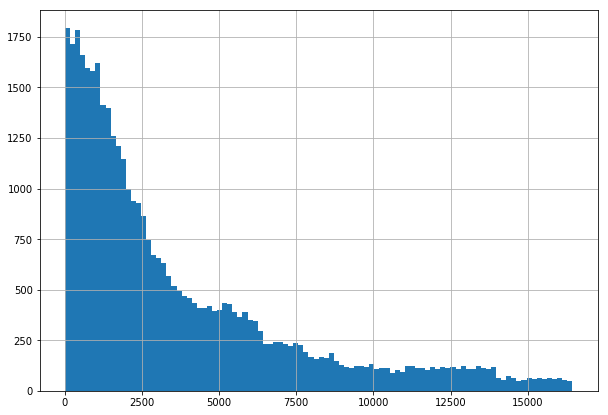

In [39]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

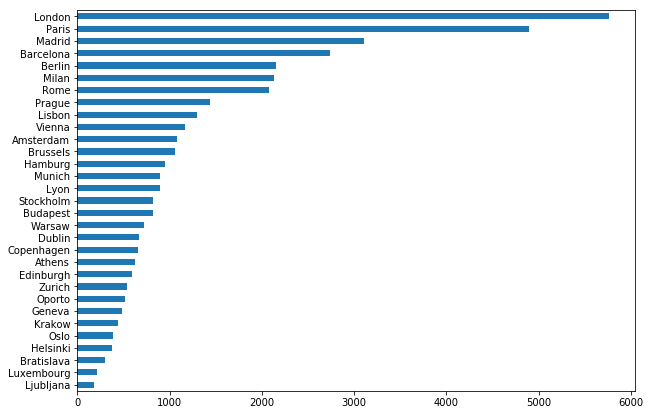

In [40]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

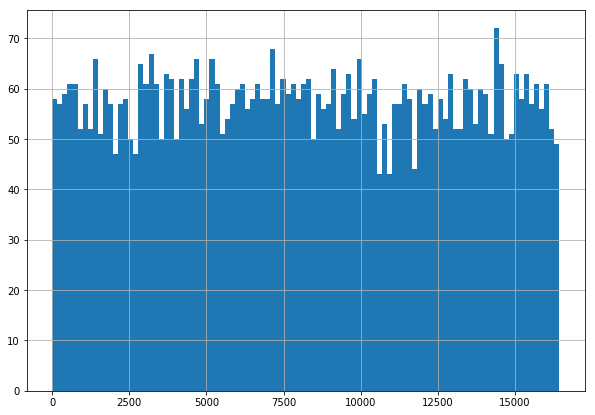

In [41]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

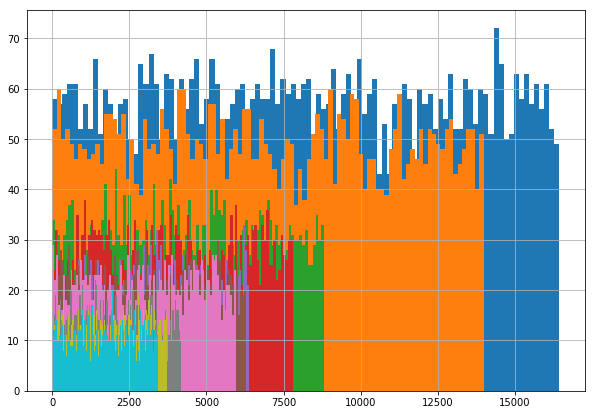

In [42]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

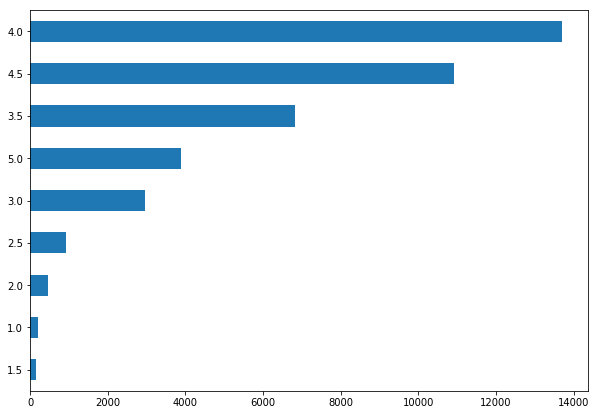

In [43]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

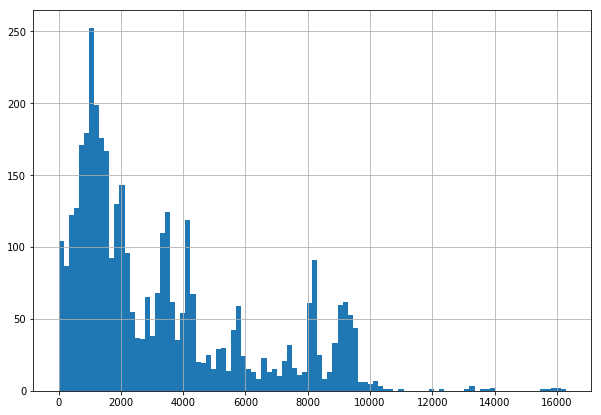

In [44]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

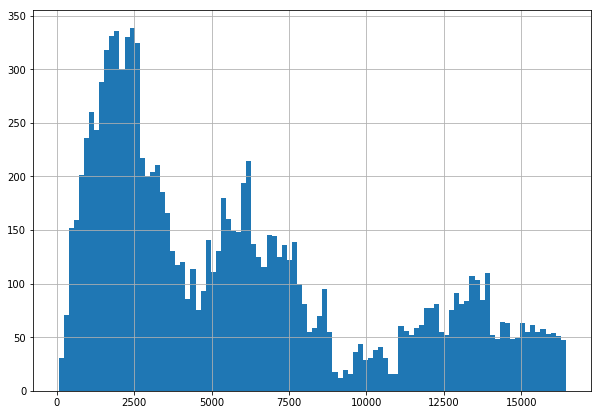

In [45]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

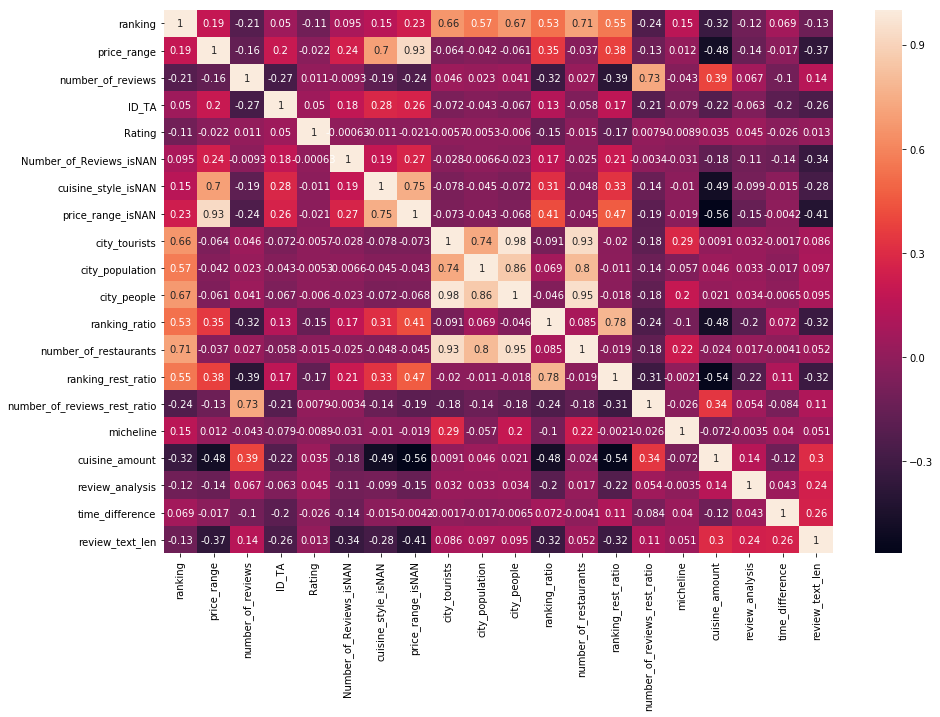

In [46]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),annot = True)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [47]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [48]:
def new_column(x, y):
    '''функция для создания новой колонки'''
    for item in y:
        if x == item:
            result = y[item]
    return result


def column_clean(s):
    '''функция для очистки колонки'''
    result = str(s[1:-1].split(','))
    return result


def review_analysis_column(x, y):
    '''функция для анализа текста'''
    result = 0
    for word in y:
        if re.search(r'\b%s\b' % word, x) is not None:
            result = y[word]
    return result


def date_time(s):
    '''функция для перевода в формат datetime'''
    date1 = re.search(r'\d{2}/\d{2}/\d{4}', s)
    if date1 is not None:
        return (datetime.strptime(date1.group(), '%m/%d/%Y').date())
    else:
        return None
    
    
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    df_output = df_input.copy()
    
    ################### 1. Предобработка ############################################################## 
    
    # переименуем столбцы для удобства обращения к ним
    df_output.columns = ['restaurant_id', 'city', 'cuisine_style', 'ranking', 'price_range', 'number_of_reviews', 'reviews', 'URL_TA', 'ID_TA','sample','Rating']
    # убираем ненужный для модели признак
    df_output.drop(['URL_TA'], axis = 1, inplace=True)
    
    ################### 2. NAN ##############################################################
        
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    df_output['Number_of_Reviews_isNAN'] = pd.isna(df_output['number_of_reviews']).astype('uint8')
    # заполним пустые ячейки в столбце 'number_of_reviews' средним значением по городу
    df_output.loc[df_output['number_of_reviews'].isnull(),['number_of_reviews']] = df_output.groupby(['city'])['number_of_reviews'].transform('mean')
    # заполним пустые ячейки в столбце 'price_range' значением "Other"
    df_output['price_range_isNAN'] = pd.isna(df_output['price_range']).astype('uint8')
    df_output['price_range'] = df_output['price_range'].fillna('Other')
    # заполним пустые ячейки в столбце 'cuisine_style' значением "Other"
    df_output['cuisine_style_isNAN'] = pd.isna(df_output['cuisine_style']).astype('uint8')
    df_output['cuisine_style'] = df_output['cuisine_style'].fillna('Other')
    # заполним пустые ячейки в столбце 'reviews' значением "[[], []]"
    df_output['reviews'] = df_output['reviews'].fillna("[[], []]")

    ################### 3. Feature Engineering ####################################################
    
    # создадим новые признаки, исходя из числа туристов, населения количества и качества ресторанов
    
    # создадим список уникальных названий городов
    city_names = df_output.city.value_counts().index.to_list()
    # добавим в датасет число туристов для каждого города
    tourists = [19233000,17560200,5440100,6714500,5959400,6481300,10065400,8948600,3539400,6410300,8354200,3942000,1450000,4066600,6000000,2604600,3822800,2850000,5213400,3069700,5728400,1660000,2240000,2341300,1150000,2732000,2140000,1240000,1290056,1139000,1127904]
    city_tourists = dict(zip(city_names,tourists))
    df_output['city_tourists'] = df_output.city.apply(lambda x: new_column(x, city_tourists))
    # добавим в датасет население для каждого города
    population = [8787892,2140000,3223334,1620343,3601131,1366180,2872800,1280508,506654,1840573,859732,1198726,1830584,1456039,515695,961609,1749734,1758143,553165,615993,655780,482005,402762,214349,499480,766739,673469,643272,424428,613894,279631]
    city_population = dict(zip(city_names,population))
    df_output['city_population'] = df_output.city.apply(lambda x: new_column(x, city_population))
    # добавим в датасет общее число жителей + туристы
    df_output['city_people'] = df_output['city_population'] + df_output['city_tourists']
    # создадим столбец отношения рэнкинга к числу туристов в городе
    df_output['ranking_ratio'] = df_output['ranking']/df_output['city_tourists']
    # создадим столбец - количество ресторанов в городе
    number_of_restaurants = df_output.groupby(['city'])['restaurant_id'].count().reset_index()
    number_of_restaurants = dict(zip(number_of_restaurants['city'].to_list(),number_of_restaurants['restaurant_id'].to_list()))
    df_output['number_of_restaurants'] = df_output.city.apply(lambda x: new_column(x, number_of_restaurants))
    # создадим столбец отношения рэнкинга к числу ресторанов в городе
    df_output['ranking_rest_ratio'] = df_output['ranking']/df_output['number_of_restaurants']
    # создадим столбец отношения числа отзывов к числу туристов в городе
    df_output['number_of_reviews_rest_ratio'] = df_output['number_of_reviews']/df_output['city_tourists'] 
    # создадим столбец отношения ресторанов со звездой Micheline к общему числу ресторанов
    city_names = df_output.city.value_counts().index.to_list()
    micheline_stars = [66,118,15,20,16,15,15,2,8,15,11,21,11,13,20,13,6,2,2,11,4,4,11,5,11,1,4,6,0,12,6]
    city_micheline_stars = dict(zip(city_names,micheline_stars))
    df_output['micheline_ratio'] = df_output.city.apply(lambda x: new_column(x, city_micheline_stars))/df_output['number_of_restaurants']
    
    # извлечем новые признаки из стоблца 'cuisine_style'
    
    # создадим признак, показывающий количество кухонь, предлагаемых в каждом ресторане
    # удалим лишние кавычки и заменим кириллицу на латинницу
    df_output['cuisine_style'] = df_output['cuisine_style'].map(
                                lambda x: x.lstrip("'").rstrip("'"))
    df_output['cuisine_style'] = df_output['cuisine_style'].map(
                                lambda x: x.replace('е', 'e').replace('а', 'a'))
    df_output['cuisine_style'] = df_output['cuisine_style'].map(
                                lambda x: x.lstrip("[").rstrip("]"))
    cuisine_style = df_output['cuisine_style'].apply(column_clean)
    # создадим список уникальных кухонь, которые встречаются в датафрейме
    cuisine_list = []
    for item in cuisine_style:
        for name in item:
            name = name.lstrip(" '").rstrip("' ")
            if name not in cuisine_list and name!='the':
                cuisine_list.append(name)
    # посчитаем сколько кухонь предлагает каждый ресторан
    cuisine_count = [len(item) if item is not None else 1 for item in cuisine_style]
    # создадим новый признак "количество кухонь" 
    df_output['cuisine_amount'] = cuisine_count
    
    # извлечем новые признаки из стоблца 'reviews'
    
    # разделим данные в столбце на два - текст отзыва и даты отзыва
    df_output[['review_text','review_date']] = pd.DataFrame(df_output['reviews'].str.split("],",1).to_list())
    df_output[['review_text']] = df_output['review_text'].apply(lambda x: x[2:])
    df_output[['review_date']] = df_output['review_date'].apply(lambda x: x[2:-2])
    # попробуем создать новый признак на основе того какие слова встречаются в тексте
    words = words = {'will come back':4,"delightful":3,"Delightful":3,"nice":2,"nice":2,'good':1, 'Good':1,"Average":0,"average":0,"bad":-1,'Bad':-1,"disgusting":-2,
                     "avoid":-3,"Avoid":-3,"worst":-4,"Worst":-4}
    df_output['review_analysis'] = df_output.review_text.apply(lambda x: review_analysis_column(x, words))
    # создадим новый признак количество символов в отзыве "text_review_len"
    df_output['review_text_len'] = df_output['review_text'].apply(lambda x: len(x))
    
    # разделим даты отзывов на два признака
    df_output[['first_review_date','second_review_date']] = pd.DataFrame(df_output['review_date'].str.split(", ",1).to_list())
    # переведем даты в формат datetime
    df_output[['first_review_date']] = df_output['first_review_date'].apply(date_time)
    df_output[['second_review_date']] = df_output['second_review_date'].dropna().apply(date_time)
    # создадим столбец 'time_difference' - временная разница между отзывами    
    time_difference = abs(df_output['first_review_date'] - df_output['second_review_date'])
    df_output['time_difference'] = time_difference.dropna().apply(lambda x: abs(np.timedelta64(x).astype(float)))
    df_output[['time_difference']] = df_output['time_difference'].fillna(0)
       
    # переведем столбец 'ID_TA' в цифровой формат
    df_output[['ID_TA']] = df_output['ID_TA'].dropna().apply(lambda x: int(x[1:]))
    df_output[['ID_TA']] = df_output['ID_TA'].fillna(0)                                      

    ################### 3. Encoding ##############################################################
    # закодируем признак 'city'
    df_output = pd.get_dummies(df_output, columns=[ 'city',], dummy_na=True)
    # закодируем признак 'price_range'
    encoder = LabelEncoder()
    df_output['price_range'] = encoder.fit_transform( df_output['price_range'].dropna())
    df_output = pd.get_dummies(df_output, columns=[ 'price_range',], dummy_na=True)
    # закодируем признак 'cuisine_style'
    dummies = df_output['cuisine_style'].str.get_dummies(sep=',')
    df_output = pd.concat([df_output,dummies], axis=1)
        
    ################### 5. Clean #################################################### 
    # убираем признаки, которые ухудшают качество предсказания
    df_output.drop(['number_of_restaurants','city_tourists','city_population'],axis = 1,inplace=True)
    
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [49]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,ranking,number_of_reviews,ID_TA,sample,Rating,Number_of_Reviews_isNAN,price_range_isNAN,cuisine_style_isNAN,city_people,ranking_ratio,...,'Tibetan','Turkish','Ukrainian','Uzbek','Vegan Options','Vegetarian Friendly','Venezuelan','Vietnamese','Wine Bar',Other
10800,5620.0,8.000000,12971996,1,5.0,0,0,0,28020892,0.000292,...,0,0,0,0,0,0,0,0,0,0
27401,6709.0,6.000000,3859523,1,5.0,0,1,0,19700200,0.000382,...,0,0,0,0,0,0,0,0,0,0
34888,8246.0,117.040915,9596193,1,5.0,1,1,0,19700200,0.000470,...,0,0,0,0,0,0,0,0,1,0
15264,6435.0,9.000000,12966756,1,4.5,0,0,0,28020892,0.000335,...,0,0,0,0,0,0,0,0,0,0
27606,11138.0,9.000000,1981754,1,3.5,0,1,1,28020892,0.000579,...,0,0,0,0,0,0,0,0,0,1
9149,3899.0,4.000000,10393292,0,0.0,0,1,0,8334843,0.000581,...,0,0,0,0,0,0,0,0,0,0
48433,1583.0,72.510078,12284452,1,4.0,1,1,1,2642762,0.000707,...,0,0,0,0,0,0,0,0,0,1
8278,1328.0,26.000000,1471821,0,0.0,0,0,0,2642762,0.000593,...,0,0,0,0,0,0,0,0,0,0
21865,407.0,35.000000,9604558,1,4.5,0,0,0,6515695,0.000068,...,0,0,0,0,0,0,0,0,0,0
2141,2424.0,6.000000,4769024,0,0.0,0,1,1,10229108,0.000271,...,0,0,0,0,0,0,0,0,0,1


In [50]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 287 entries, ranking to Other
dtypes: float64(8), int64(239), uint8(40)
memory usage: 96.1 MB


In [51]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [52]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [53]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 286), (40000, 286), (40000, 285), (32000, 285), (8000, 285))

# Model 
Сам ML

In [54]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [55]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [56]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)
y_pred = [np.round(x*2)/2 for x in y_pred]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [57]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.1658125


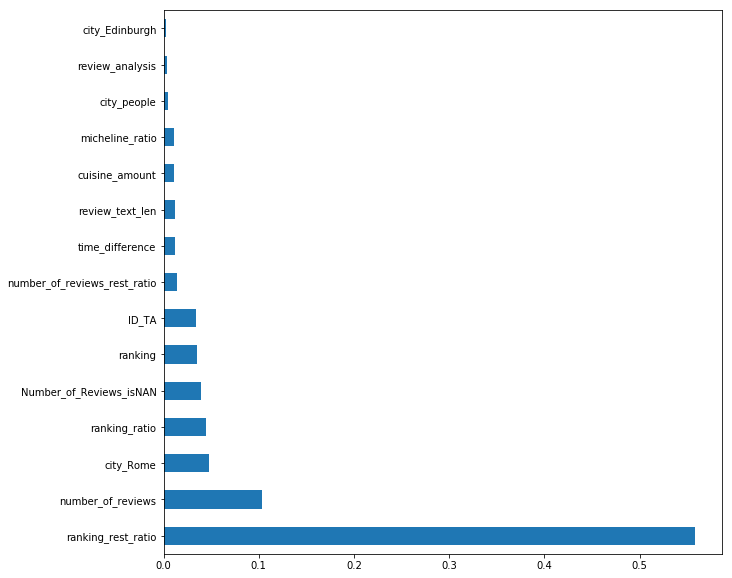

In [58]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [59]:
test_data.sample(10)

,ranking,number_of_reviews,ID_TA,Rating,Number_of_Reviews_isNAN,price_range_isNAN,cuisine_style_isNAN,city_people,ranking_ratio,ranking_rest_ratio,...,'Tibetan','Turkish','Ukrainian','Uzbek','Vegan Options','Vegetarian Friendly','Venezuelan','Vietnamese','Wine Bar',Other
4881,8623.0,13.000000,3678867,0.0,0,0,0,19700200,0.000491,1.411755,...,0,0,0,0,0,0,0,0,0,0
8622,799.0,38.000000,8515616,0.0,0,0,0,5522639,0.000196,0.697817,...,0,0,0,0,0,0,0,0,0,0
7341,8157.0,117.040915,12598511,0.0,1,0,0,19700200,0.000465,1.335462,...,0,0,0,0,0,0,0,0,0,0
8492,13034.0,4.000000,5122176,0.0,0,1,1,28020892,0.000678,1.812039,...,0,0,0,0,0,0,0,0,0,1
3958,3715.0,33.000000,8374592,0.0,0,1,1,7847480,0.000573,1.378990,...,0,0,0,0,0,0,0,0,0,1
5754,588.0,61.000000,12556266,0.0,0,0,0,9213932,0.000070,0.428571,...,0,0,0,0,0,0,0,0,0,0
6873,1451.0,8.000000,8800773,0.0,0,1,1,4608143,0.000509,1.568649,...,0,0,0,0,0,0,0,0,0,1
6857,3255.0,47.000000,4137228,0.0,0,0,0,28020892,0.000169,0.452523,...,0,0,0,0,0,0,0,0,0,0
2893,4455.0,15.000000,6650324,0.0,0,0,0,8334843,0.000663,1.312224,...,0,0,0,0,0,0,0,0,0,0
2871,433.0,80.000000,783929,0.0,0,0,0,1649480,0.000377,0.733898,...,0,0,0,0,0,0,0,0,0,0


In [60]:
test_data = test_data.drop(['Rating'], axis=1)

In [61]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [62]:
predict_submission = model.predict(test_data)
predict_submission = [np.round(x*2)/2 for x in predict_submission]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [63]:
predict_submission

[3.0,
 4.0,
 4.0,
 4.5,
 4.5,
 4.5,
 2.5,
 2.5,
 4.0,
 4.5,
 4.0,
 3.5,
 4.0,
 4.0,
 3.5,
 3.0,
 3.5,
 4.0,
 2.5,
 4.0,
 4.0,
 4.5,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.5,
 3.5,
 3.5,
 4.0,
 5.0,
 3.5,
 3.5,
 4.5,
 4.0,
 4.5,
 4.5,
 4.0,
 5.0,
 4.5,
 3.0,
 4.0,
 3.5,
 4.0,
 3.0,
 4.0,
 4.0,
 5.0,
 3.5,
 3.5,
 4.5,
 4.0,
 5.0,
 4.5,
 3.5,
 3.5,
 4.0,
 4.0,
 4.5,
 4.5,
 4.5,
 4.5,
 4.0,
 4.5,
 3.5,
 4.5,
 4.5,
 4.0,
 4.5,
 2.5,
 4.5,
 4.0,
 4.0,
 5.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.0,
 4.5,
 5.0,
 4.0,
 3.5,
 4.0,
 3.5,
 4.0,
 4.5,
 4.5,
 4.0,
 3.5,
 4.5,
 4.0,
 4.0,
 3.0,
 3.5,
 4.0,
 3.5,
 4.0,
 4.0,
 3.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.5,
 4.5,
 4.5,
 4.0,
 4.0,
 4.0,
 3.5,
 4.5,
 4.0,
 4.0,
 5.0,
 4.0,
 4.5,
 3.5,
 4.0,
 3.5,
 5.0,
 4.0,
 4.5,
 4.0,
 4.0,
 4.0,
 3.5,
 2.5,
 4.5,
 4.0,
 3.0,
 4.0,
 4.0,
 3.0,
 4.0,
 4.0,
 4.0,
 4.5,
 5.0,
 4.0,
 5.0,
 4.5,
 3.5,
 3.5,
 4.5,
 3.5,
 4.0,
 4.0,
 4.0,
 4.5,
 4.0,
 4.5,
 1.0,
 4.5,
 4.5,
 4.5,
 3.5,
 4.0,
 4.0,
 4.0,
 3.5,
 4.5,
 4.0,
 4.0,
 4.5,
 3.5

In [64]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.0
1,id_1,4.0
2,id_2,4.0
3,id_3,4.5
4,id_4,4.5
5,id_5,4.5
6,id_6,2.5
7,id_7,2.5
8,id_8,4.0
9,id_9,4.5


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
